<a href="https://colab.research.google.com/github/zookeeper464/data-analysis/blob/main/Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "/content/vgames2.csv"
sdf = pd.read_csv(path)

In [37]:
df = sdf.iloc[:,1:]
df.columns
# df["Year"]에 NaN때문에 float형태로 value구성
# sales들은 m =,k들 때문에 object형태로 구성
# Year 관련 데이터 분석의 경우 NaN을 신경쓰고 Sales의 경우 m,M,k,K을 신경쓴다.

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [38]:
#M,K가 들어간 값에서 M,K를 제거하고 문자로 변환한다.(K가 들어간 값은 항상 10보다 크다.)
for sales in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']:
  for word in ["M","K"]:
    df[sales] = df[sales].str.replace(word,"")
df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].apply(pd.to_numeric)

In [ ]:
#K가 들어간 값이 항상 10보다 크기 때문에 이를 이용하여 값을 백만단위에서 1단위로 바꾼다.
for sales in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']:
  cond = df[sales]<10
  df[sales][cond] = df[sales][cond] *1000
  df[sales] = df[sales] * 1000

In [20]:
#sales들은 완성되었다. 하지만 year, genre,publisher에 na값이 존재한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [65]:
df1 = df.dropna(axis=0)

In [ ]:
#출시 일정이 제대로 나오지 않은 값을 제대로 바꾼다.
cond1 = df1["Year"]<30
df1["Year"][cond1] = df1["Year"][cond1] + 2000
cond2 = df1["Year"]>30
cond3 = df1["Year"]<100
df1["Year"][cond2 & cond3] = df1["Year"][cond2 & cond3] + 1900

In [ ]:
# 출시연도를 실수에서 정수로 바꾸어 데이터의 용량을 줄인다.
df1.Year = pd.to_numeric(df1.Year, downcast='integer')

In [69]:
df2 = df1[['Genre', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]

In [100]:
gns_df = df2.groupby('Genre').sum()
gns_df1 = gns_df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
gns_df1["Total_Sales"] = gns_df["NA_Sales"]+gns_df["EU_Sales"]+gns_df["JP_Sales"]+gns_df["Other_Sales"]

In [103]:
gns_df2 = gns_df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
for sale in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']:
  gns_df2[sale] = gns_df1[sale]/gns_df1["Total_Sales"]

In [105]:
gns_df3 = gns_df.T

In [123]:
gns_df4 = gns_df3[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']]
gns_df4["Total_Sales"] = 0
for genre in ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']:
       gns_df4["Total_Sales"] += gns_df3[genre]

In [126]:
gns_df5 = gns_df3[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']]
for genre in ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']:
       gns_df5[genre] = gns_df3[genre]/gns_df4["Total_Sales"]

In [134]:
gns_df6 = gns_df1.T
gns_df7 = gns_df6[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']]
gns_df7["Total_Sales"] = 0
for genre in ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']:
       gns_df7["Total_Sales"] += gns_df6[genre]

In [ ]:
gns_df7 = gns_df6[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']]
gns_df7["Total_Sales"] = 0
for genre in ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy']:
       gns_df7["Total_Sales"] += gns_df6[genre]

In [139]:
gns_df8 = gns_df7[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy','Total_Sales']]
for genre in ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy','Total_Sales']:
       gns_df8[genre] = gns_df7[genre]/(8.428847e+09)

In [146]:
gns_df9 = gns_df7.T
gns_df10 = gns_df8.T

In [ ]:
# gns_df1 : 장르별 지역에 따른 판매량과 총합
# gns_df2 : 장르별 지역에 따른 판매량 비율
# gns_df4 : 지역별 장르에 따른 판매량과 총합
# gns_df5 : 지역별 장르에 따른 판매량 비율
# gns_df7 : 지역별 장르 총합을 포함한 df
# gns_df8 : 지역별 장르 총합을 포함한 비율 df
# gns_df9 : 장르별 지역 총합을 포함한 df
# gns_df10 : 장르별 지역 총합을 포함한 비율 df

In [131]:
import matplotlib.pyplot as plt

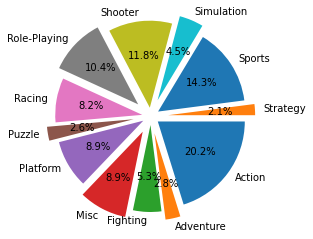

In [161]:
s = gns_df10['Total_Sales'].iloc[:-1]
plt.pie(x=s, labels=gns_df10.iloc[:-1].index, autopct='%.1f%%', counterclock=False, explode=[0.1,0.20]*6);

		NA_Sales


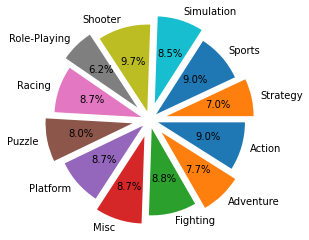

In [177]:
sn = gns_df2['NA_Sales']
su = gns_df2['EU_Sales']
sj = gns_df2['JP_Sales']
so = gns_df2['Other_Sales']
print("\t\tNA_Sales")
plt.pie(x=sn, labels=gns_df2.index, autopct='%.1f%%', counterclock=False, explode=[0.1,0.20]*6);

		EU_Sales


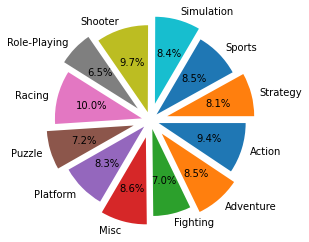

In [178]:
print("\t\tEU_Sales")
plt.pie(x=su, labels=gns_df2.index, autopct='%.1f%%', counterclock=False, explode=[0.1,0.20]*6);

		JP_Sales


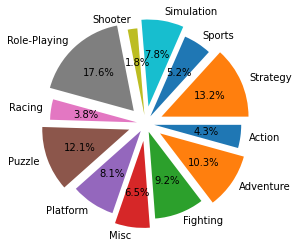

In [179]:
print("\t\tJP_Sales")
plt.pie(x=sj, labels=gns_df2.index, autopct='%.1f%%', counterclock=False, explode=[0.1,0.20]*6);

		Other_Sales


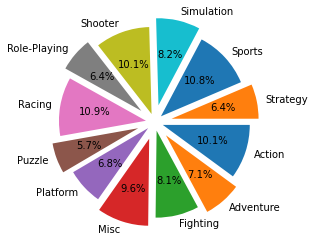

In [180]:
print("\t\tOther_Sales")
plt.pie(x=so, labels=gns_df2.index, autopct='%.1f%%', counterclock=False, explode=[0.1,0.20]*6);

In [181]:
yng_dfn = df1[["Year",'Genre','NA_Sales']]
yng_dfe = df1[["Year",'Genre','EU_Sales']]
yng_dfj = df1[["Year",'Genre','JP_Saless']]
yng_dfo = df1[["Year",'Genre','Other_Sales']]

In [3]:
# 1. 지역에 따른 선호하는 게임 장르조사 - 성공
# 2. 연도별 게임의 트렌드분석
# - 앞으로 시간과 지역에 따른 선호도 변화조사 필요 -> 방향성 제시
# 3. 출고량이 높은 게임에 대한 분석 및 시각화
# - 이 게임이 왜 이 시간과 지역에 출고량이 높았는지 분석 -> 방향성 제시

In [ ]:
# 2. 방향
# tidy형태로 바꾼 뒤 index에 따라서 groupby하고 pivot하여 표로 만든다.
# 각 시장마다 선호도의 변화를 선 그래프로 나타낸다.(변화율을 가장 잘 보여준다.)

In [ ]:
# 3. 방향
# 출고량의 총합의 열을 추가하여 총합이 가장 높은 100개 항목을 지역별, 총합으로 df생성
# 각 시기와 회사, 장르별로 분석한다 .